### How to tell which way a galaxy rotates

When we look up at the sky, we see a variety of twinkling lights. These lights are all nearby stars, except for a few planets. The furthest object we can see with the unaided eye is, however, a galaxy (specifically Andromeda).

<img src="https://en.es-static.us/upl/2012/08/Andromeda_galaxy_Ted_Van_August_2012.jpeg" width=300 height=300>
<center>Can you spot Andromeda in this picture?</center>

Galaxies can be classified based on their shape. They can be elliptical, irregular, or spiral (like our own Milky Way). Spiral galaxies can spin either clockwise (CW) or counterclockwise (CCW). According to one of the major theories in astronomy, the universe is isotropic (the same in all directions). This means that there should be an equal number of CW and CCW galaxies in the sky, and they should be evenly spread out in all directions.

<img src="https://media.stsci.edu/uploads/image/display_image/1016/print.jpg" width=600 height=600>
<center>What are the shapes of each of these galaxies?</center>

Based on a list of observable properties (such as size, brightness, and tilt angle), can we determine which galaxies are CW and which are CCW? Are there any differences between CW and CCW galaxies, or do they all "look" the same? Let us examine the physical properties of 13,440 galaxies to find out!

We will be looking at various measurements taken across five "bands." A band is simply the wavelength at which the object is observed. By observing the same object across five different bands, we have five times the data! Here is a table of the five different bands:

<center>Bands and their wavelengths</center>

| Band  | Wavelength |   Spectrum   |
|-------|------------|--------------|
|   <center>U</center>   |   <center>365 nm</center>   |  ultraviolet |
|   <center>G</center>   |   <center>464 nm</center>   |    visible   |
|   <center>R</center>   |   <center>658 nm</center>   |    visible   |
|   <center>I</center>   |   <center>806 nm</center>   |   infrared   |
|   <center>Z</center>   |   <center>900 nm</center>   |   infrared   |

Let's get started!

#### Setting up our analysis

First, we need to import the necessary packages, load all of our data into dataframes (separated into various groups), and define helper functions to extract CW and CCW data from each dataframe.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
coordinates = pd.read_csv('coordinates.csv', index_col=0)
devaucouleurs = pd.read_csv('devaucouleurs.csv', index_col=0)
exponential = pd.read_csv('exponential.csv', index_col=0)
extinction = pd.read_csv('extinction.csv', index_col=0)
fiber = pd.read_csv('fiber.csv', index_col=0)
flags = pd.read_csv('flags.csv', index_col=0)
isophotal = pd.read_csv('isophotal.csv', index_col=0)
m = pd.read_csv('m.csv', index_col=0)
model = pd.read_csv('model.csv', index_col=0)
object_info = pd.read_csv('object_info.csv', index_col=0)
petro = pd.read_csv('petro.csv', index_col=0)
position = pd.read_csv('position.csv', index_col=0)
prof = pd.read_csv('prof.csv', index_col=0)
psf = pd.read_csv('psf.csv', index_col=0)
signal = pd.read_csv('signal.csv', index_col=0)
sky = pd.read_csv('sky.csv', index_col=0)
stokes = pd.read_csv('stokes.csv', index_col=0)
target = pd.read_csv('target.csv', index_col=0)
texture = pd.read_csv('texture.csv', index_col=0)
types = pd.read_csv('types.csv', index_col=0)

In [3]:
def get_cw(df):
    return df[df['rotation'] == 'cw']

def get_ccw(df):
    return df[df['rotation'] == 'ccw']

#### Position in the sky

Next, we can plot the coordinates (position in the sky) of the CW and CCW galaxies to make sure they're evenly spread throughout the observed region. Right ascension (RA) and declination (dec), both in degrees, are used to define position.

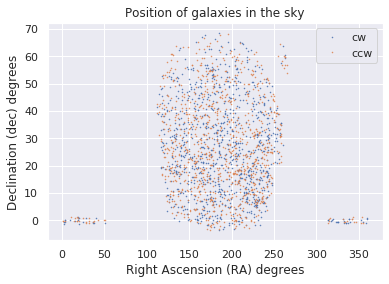

In [4]:
plt.plot('ra', 'dec', data=get_cw(coordinates).sample(1000), linestyle='', marker='o', markersize=0.5, label='cw')
plt.plot('ra', 'dec', data=get_ccw(coordinates).sample(1000), linestyle='', marker='o', markersize=0.5, label='ccw')
plt.legend()
plt.xlabel('Right Ascension (RA) degrees')
plt.ylabel('Declination (dec) degrees')
plt.title('Position of galaxies in the sky')
plt.show()

We can see that the CW and CCW galaxies are evenly spread across the sky (that is, no section has more blue/orange than another).

#### Magnitudes

Let's examine the magnitude of each type of galaxy. Magnitude is a measure of how "bright" the galaxy is; more specifically, magnitude is a measure of how intense of a signal we can detect across various bands. When we plot the magnitudes in the five bands, we see that CW galaxies tend to have a higher magnitude than CCW galaxies in the bands with larger wavelength (R, I, and Z bands).

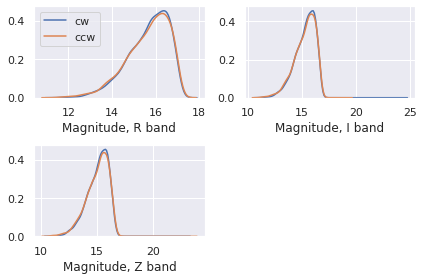

In [5]:
plt.subplot(221)
sns.distplot(get_cw(signal)['r'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(signal)['r'], label='ccw', hist=False, kde=True)
plt.xlabel('Magnitude, R band')
plt.subplot(222)
sns.distplot(get_cw(signal)['i'], hist=False, kde=True)
sns.distplot(get_ccw(signal)['i'], hist=False, kde=True)
plt.xlabel('Magnitude, I band')
plt.subplot(223)
sns.distplot(get_cw(signal)['z'], hist=False, kde=True)
sns.distplot(get_ccw(signal)['z'], hist=False, kde=True)
plt.xlabel('Magnitude, Z band')
plt.tight_layout()
plt.show()

The magnitudes were measured and fitted to various models of stellar magnitude. The plot above shows the model of the magnitude that most closely fits the observed data. We can examine the magnitudes according to a few individual models to see if this pattern persists.

By plotting magnitudes in the R band for four different models (Petrosian, Exponential, Fiber, and de Vaucouleurs), we can see that the measurements are consistent with the trend we noticed above.

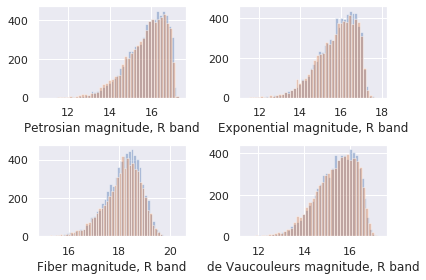

In [6]:
plt.subplot(221)
sns.distplot(get_cw(petro)['petroMag_r'], label='cw', hist=True, kde=False)
sns.distplot(get_ccw(petro)['petroMag_r'], label='ccw', hist=True, kde=False)
plt.xlabel('Petrosian magnitude, R band')
plt.subplot(222)
sns.distplot(get_cw(exponential)['expMag_r'], label='cw', hist=True, kde=False)
sns.distplot(get_ccw(exponential)['expMag_r'], label='ccw', hist=True, kde=False)
plt.xlabel('Exponential magnitude, R band')
plt.subplot(223)
sns.distplot(get_cw(fiber)['fiberMag_r'], label='cw', hist=True, kde=False)
sns.distplot(get_ccw(fiber)['fiberMag_r'], label='ccw', hist=True, kde=False)
plt.xlabel('Fiber magnitude, R band')
plt.subplot(224)
sns.distplot(get_cw(devaucouleurs)['deVMag_r'], label='cw', hist=True, kde=False)
sns.distplot(get_ccw(devaucouleurs)['deVMag_r'], label='ccw', hist=True, kde=False)
plt.xlabel('de Vaucouleurs magnitude, R band')
plt.tight_layout()
plt.show()

#### Shape of Galaxies

Other observable quantities can also be fitted to various models of magnitude. One such measurement is phi, which is the angle at which the galaxy is tilted. Let's look at the tilt angle fitted to the Exponential and de Vaucouleurs models. We can see that the CW galaxies tend to have a larger tilt angle than the CCW galaxies.

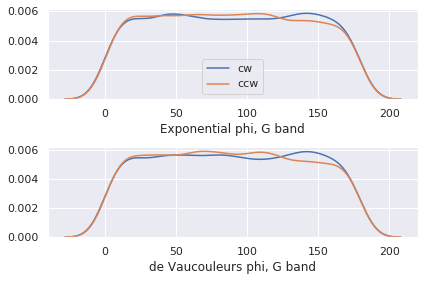

In [7]:
plt.subplot(211)
sns.distplot(get_cw(exponential)['expPhi_g'], label='cw', hist=False, kde=True)
sns.distplot(get_ccw(exponential)['expPhi_g'], label='ccw', hist=False, kde=True)
plt.xlabel('Exponential phi, G band')
plt.subplot(212)
sns.distplot(get_cw(devaucouleurs)['deVPhi_g'], hist=False, kde=True)
sns.distplot(get_ccw(devaucouleurs)['deVPhi_g'], hist=False, kde=True)
plt.xlabel('de Vaucouleurs phi, G band')
plt.tight_layout()
plt.show()

Finally, each galaxy has a major and minor axis. The ratio of axes describe how "oblong" an object is. A perfect circle has a ratio of 1; the further away the ratio is from 1, the more "oval" it is. 

<img src="https://mgh-images.s3.amazonaws.com/9780840064196/13265-12.2-50IPS1.png" width=300 height=300>

We can compare the axis ratio of our galaxies (fitted to two models) and see if CW and CCW galaxies differ in some way. It seems that CW galaxies are more likely to have a smaller axis ratio (further away from 1), while CCW galaxies are more likely to have a larger axis ratio (closer to 1). This means that CW galaxies in this dataset are typically more "oblong" than CCW galaxies.

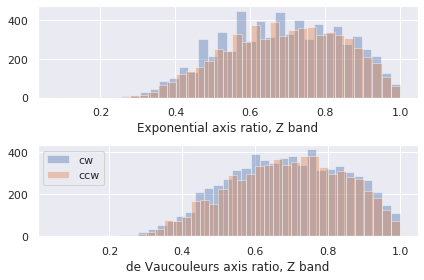

In [8]:
plt.subplot(211)
sns.distplot(get_cw(exponential)['expAB_z'], label='cw', hist=True, kde=False, norm_hist=False)
sns.distplot(get_ccw(exponential)['expAB_z'], label='ccw', hist=True, kde=False, norm_hist=False)
plt.xlabel('Exponential axis ratio, Z band')
plt.subplot(212)
sns.distplot(get_cw(devaucouleurs)['deVAB_z'], label='cw', hist=True, kde=False, norm_hist=False)
sns.distplot(get_ccw(devaucouleurs)['deVAB_z'], label='ccw', hist=True, kde=False, norm_hist=False)
plt.xlabel('de Vaucouleurs axis ratio, Z band')
plt.legend()
plt.tight_layout()
plt.show()

We have established that there are various differences between CW and CCW galaxies. While they are evenly distributed across the sky, they tend to have different magnitudes, tilt angles, and shapes. We will need to perform further statistical analysis to determine how much of an impact these differences have on the rotation of a galaxy.